In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/height_data.csv')
df.head()

,Height
0,174
1,189
2,185
3,195
4,149


## Measure of central tendency

In [3]:
df.mean()

Height    169.944
dtype: float64

In [4]:
np.mean(df['Height'])

np.float64(169.944)

In [5]:
np.median(df)

np.float64(170.5)

In [6]:
df.value_counts()

Height
188       15
179       14
187       14
168       13
178       13
172       12
184       12
182       12
150       11
183       11
181       11
185       11
165       10
157       10
154       10
169       10
195       10
153       10
177        9
167        9
166        9
161        9
164        9
162        9
159        9
142        9
145        9
146        9
186        9
190        9
174        8
180        8
152        8
163        8
171        8
141        8
151        8
140        8
147        7
176        7
197        7
191        7
160        7
155        6
192        6
156        6
170        6
196        6
149        5
158        5
148        5
144        5
198        5
193        5
194        5
189        5
173        4
175        4
143        3
199        3
Name: count, dtype: int64

In [10]:
# np.mode(df) nie ma takiej funkcji
values, counts = np.unique(df, return_counts=True)
mode_value = values[np.argmax(counts)]
mode_value

np.int64(188)

In [8]:
def mode(ndarray):
    values, counts = np.unique(ndarray, return_counts=True)
    return values[np.argmax(counts)]

In [9]:
df.mode()

,Height
0,188


In [11]:
np.min(df)

np.int64(140)

In [12]:
np.max(df)

np.int64(199)

In [13]:
# RANGE

range = np.max(df) - np.min(df)
range

np.int64(59)

In [24]:
np.ptp(df)

np.int64(59)

In [7]:
# IQR

q1 = np.percentile(df, 25, method='lower')
q1

np.int64(156)

In [8]:
q3 = np.percentile(df, 75, method='lower')
q3

np.int64(184)

In [16]:
iqr = q3 - q1
iqr

np.int64(28)

In [17]:
def irq(df):
    return np.percentile(df, 75, method='lower') - np.percentile(df, 25, method='lower')

In [18]:
df.quantile(.25)

Height    156.0
Name: 0.25, dtype: float64

In [21]:
!uv add statsmodels

Resolved 114 packages in 683ms                                       
Installed 2 packages in 1.37s                                    
 + patsy==1.0.1
 + statsmodels==0.14.4


In [20]:
!uv add scipy

Resolved 112 packages in 590ms                                       
Installed 1 package in 209ms                                     
 + scipy==1.15.2


In [22]:
import statsmodels
from scipy import stats

In [23]:
stats.iqr(df)

np.float64(28.0)

In [28]:
# Variance

np.var(df['Height'], ddof=1)

np.float64(268.1491623246493)

In [27]:
df.var()

Height    268.149162
dtype: float64

In [29]:
from statsmodels.stats.weightstats import DescrStatsW

In [31]:
st = DescrStatsW(df['Height'])

In [32]:
st

In [33]:
st.mean

np.float64(169.944)

In [34]:
st.var

np.float64(267.612864)

In [37]:
np.std(df['Height'], ddof=1)

np.float64(16.375260679593755)

In [38]:
df.std(ddof=0)

Height    16.358877
dtype: float64

In [39]:
np.sqrt(st.var)

np.float64(16.35887722308594)

In [40]:
# Sewness

df.skew()

Height   -0.121914
dtype: float64

In [41]:
df.skew().max()

np.float64(-0.12191368980139153)

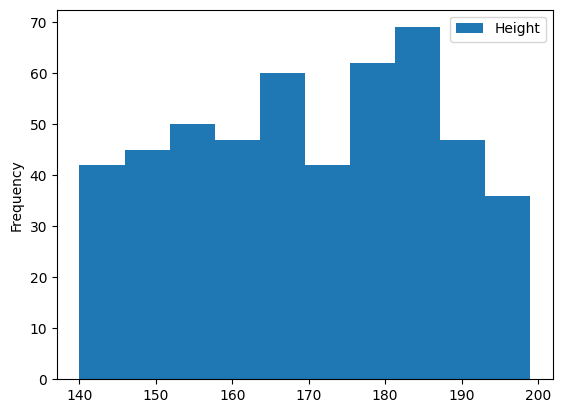

In [42]:
df.plot.hist()
plt.show()

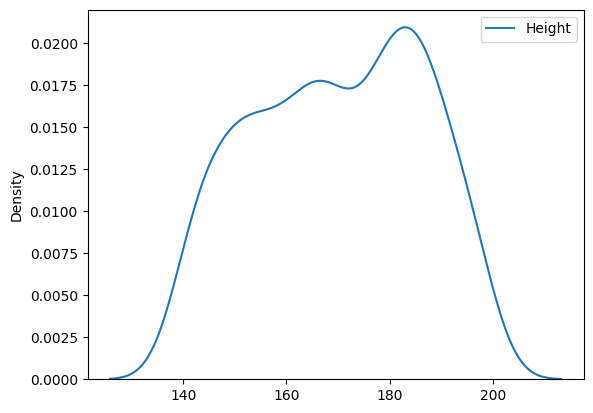

In [43]:
sns.kdeplot(data=df)

plt.show()

In [44]:
stats.skew(df['Height'])

np.float64(-0.12154764352037799)

In [45]:
from statsmodels.stats import stattools

In [47]:
stattools.robust_skewness(df['Height'])

(np.float64(-0.12154764352037792),
 np.float64(-0.03571428571428571),
 np.float64(-0.03938792859166985),
 np.float64(-0.03398766262609847))

In [48]:
#  Kurtosis

from scipy.stats import kurtosis

In [49]:
kurtosis(df['Height']) # domyslnie znormalizowana (odjemuje 3 )

np.float64(-1.1204815940488286)

In [50]:
kurtosis(df['Height'], fisher=False)

np.float64(1.8795184059511714)

In [53]:
df.describe(percentiles=np.arange(0, 1, 0.1))

,Height
count,500.000000
mean,169.944000
std,16.375261
min,140.000000
0%,140.000000
10%,146.000000
20%,153.000000
30%,159.000000
40%,165.000000
50%,170.500000
